In [54]:
import numpy as np
import pandas as pd

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [55]:
Ravdess = "C:\\Users\\janga\\RAVDESS\\audio_speech_actors_01-24\\"

# RAVDESS DataFrame

Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

* Vocal channel (01 = speech, 02 = song).

* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

* Repetition (01 = 1st repetition, 02 = 2nd repetition).

* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* Video-only (02)

* Speech (01)

* Fearful (06)

* Normal intensity (01)

* Statement "dogs" (02)

* 1st Repetition (01)-

* 12th Actor (12) - Female (as the actor ID number is even)

In [56]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    
    actor = os.listdir(Ravdess + '/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\janga\RAVDESS\audio_speech_actors_01-...
1  neutral  C:\Users\janga\RAVDESS\audio_speech_actors_01-...
2  neutral  C:\Users\janga\RAVDESS\audio_speech_actors_01-...
3  neutral  C:\Users\janga\RAVDESS\audio_speech_actors_01-...
4     calm  C:\Users\janga\RAVDESS\audio_speech_actors_01-...

In [57]:
Ravdess_df.tail()

Emotions                                               Path
1435  surprise  C:\Users\janga\RAVDESS\audio_speech_actors_01-...
1436  surprise  C:\Users\janga\RAVDESS\audio_speech_actors_01-...
1437  surprise  C:\Users\janga\RAVDESS\audio_speech_actors_01-...
1438  surprise  C:\Users\janga\RAVDESS\audio_speech_actors_01-...
1439  surprise  C:\Users\janga\RAVDESS\audio_speech_actors_01-...

# Data Visualisation

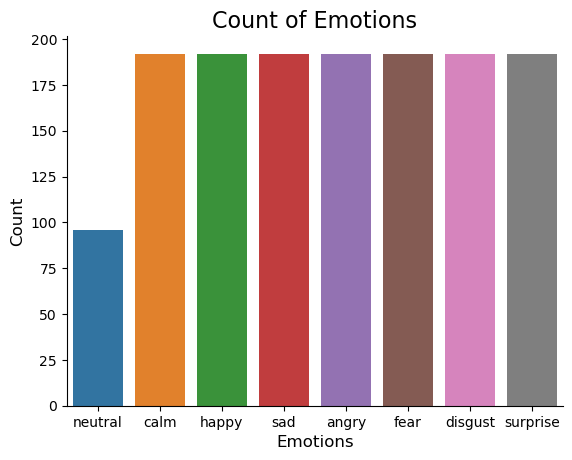

In [58]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df, x = Ravdess_df['Emotions'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

We can also plot waveplots and spectograms for audio signals

* Waveplots - Waveplots let us know the loudness of the audio at a given time.
* Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [59]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

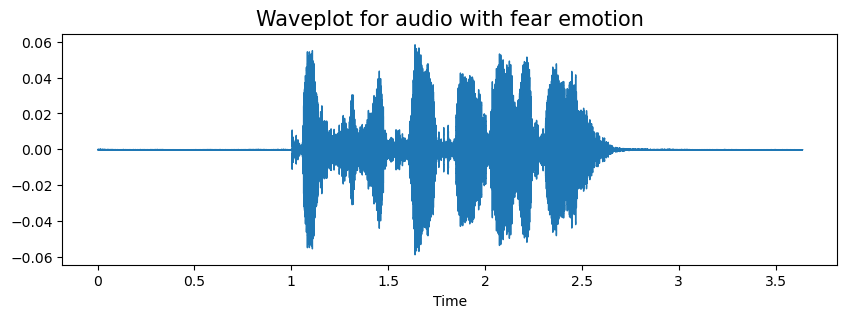

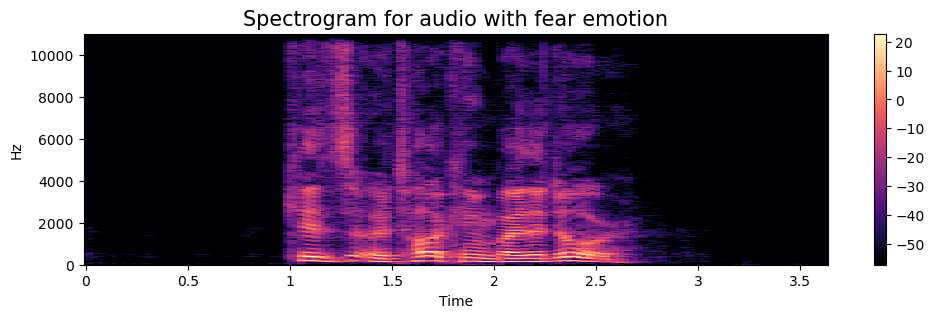

In [60]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

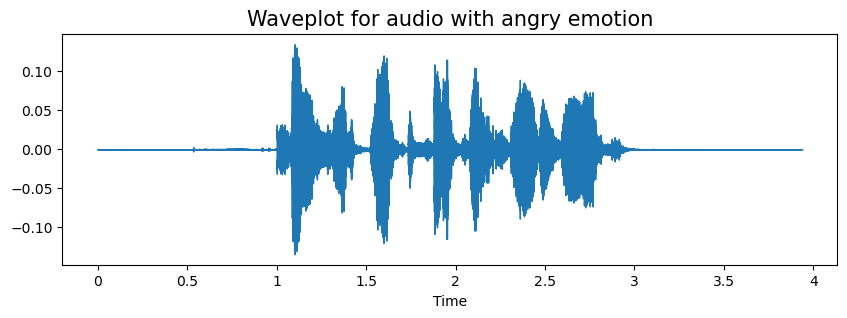

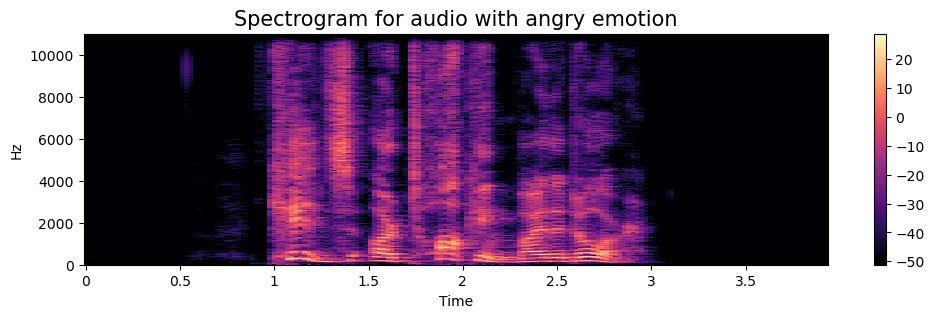

In [61]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

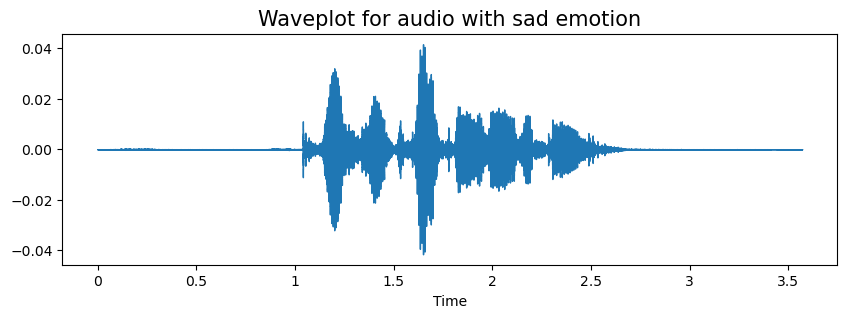

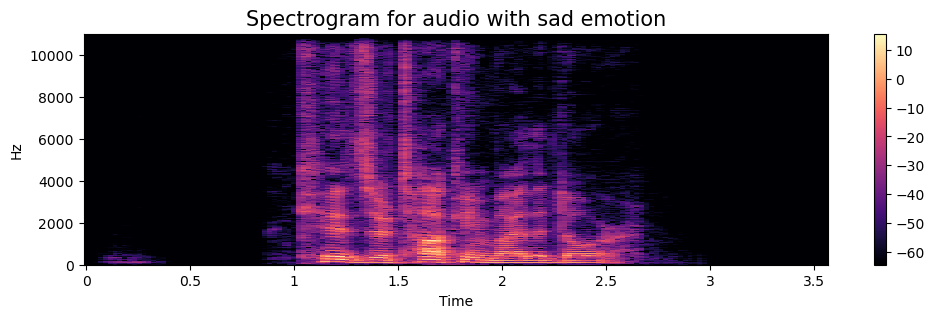

In [62]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

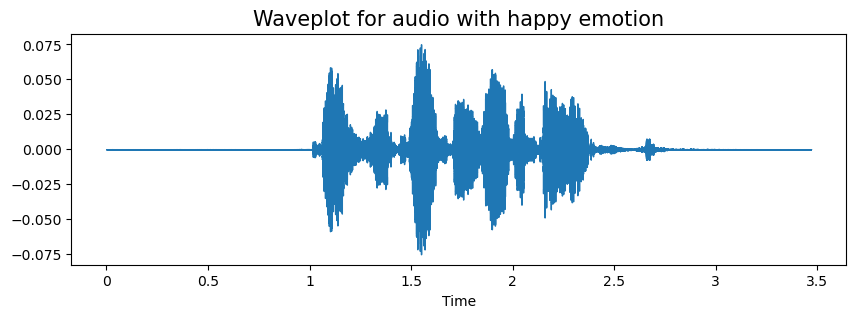

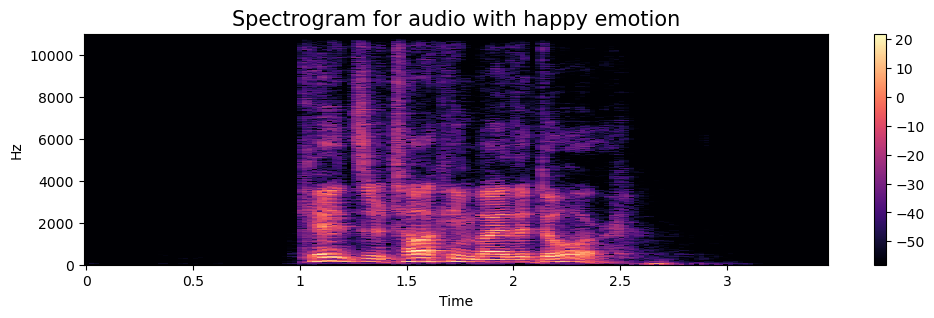

In [63]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

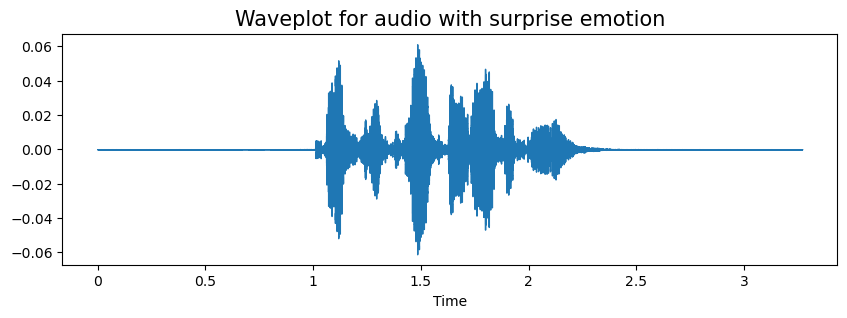

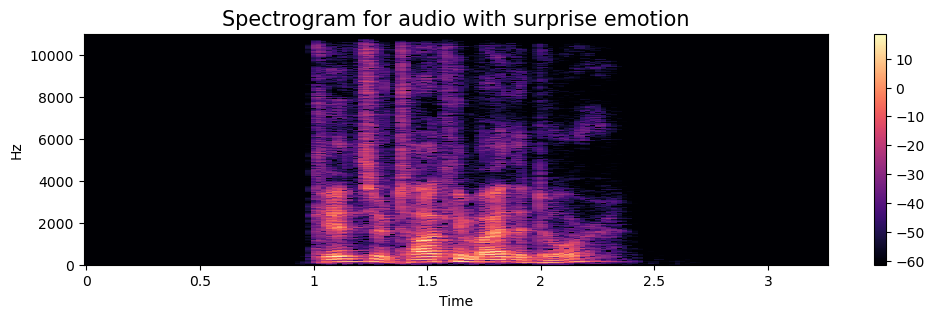

In [64]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

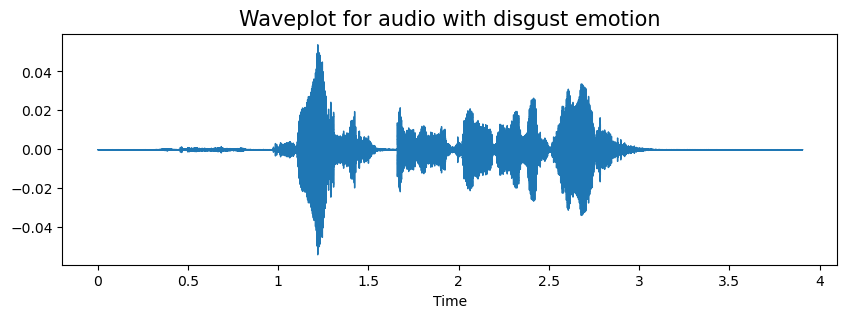

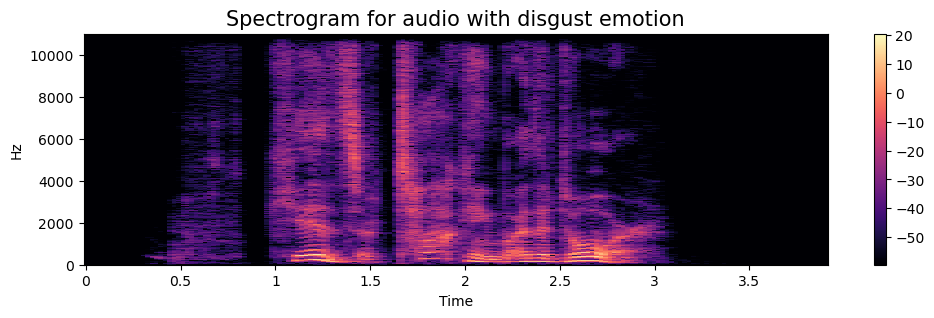

In [65]:
emotion='disgust'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

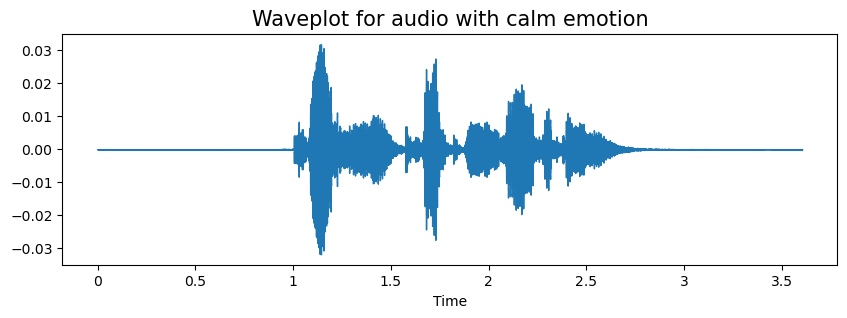

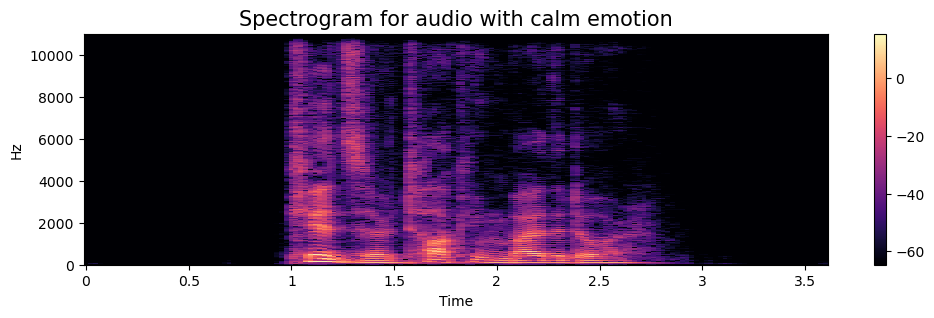

In [66]:
emotion='calm'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

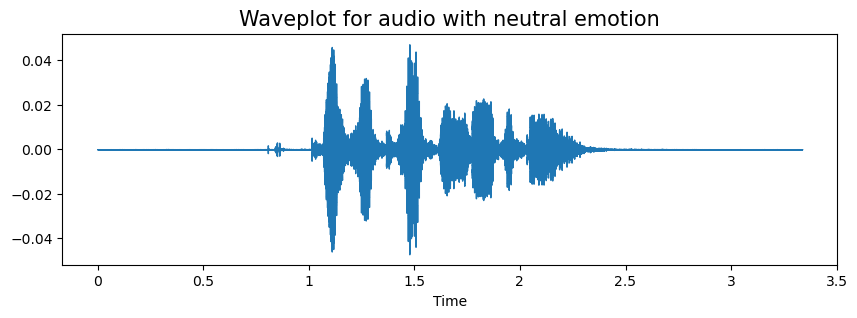

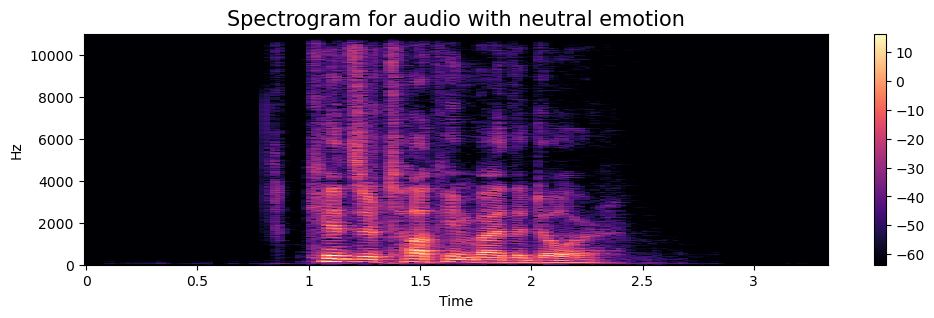

In [67]:
emotion='neutral'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

* Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

In [68]:
def extract_features(data, sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res = extract_features(data, sample_rate)
    result = np.array(res)
    
    return result

In [86]:
X, Y = [], []
for path, emotion in zip(Ravdess_df.Path, Ravdess_df.Emotions):
    feature = get_features(path)
    X.append(feature)
    Y.append(emotion)

In [87]:
len(X), len(Y)

(1440, 1440)

In [88]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750032  0.730624  0.735275  0.713529  0.660531   
1  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
2  0.337678  0.715208  0.759374  0.755704  0.757634  0.743580  0.651788   
3  0.323342  0.741108  0.752255  0.744445  0.732210  0.735576  0.684238   
4  0.258536  0.611022  0.697835  0.729005  0.690473  0.664096  0.656875   

          7         8         9  ...       153       154       155       156  \
0  0.684966  0.733049  0.753972  ...  0.000004  0.000003  0.000002  0.000002   
1  0.628977  0.679179  0.707283  ...  0.000007  0.000007  0.000007  0.000007   
2  0.629598  0.679255  0.737464  ...  0.000013  0.000013  0.000015  0.000020   
3  0.673684  0.699704  0.733065  ...  0.000020  0.000019  0.000025  0.000080   
4  0.630116  0.668770  0.673900  ...  0.000006  0.000004  0.000012  0.000006   

        157       158       159       160           161   labels  
0  0.000005  0.000008  0.000007  0.000005  4.245834e-07  neutral  
1  0.000012  0.000010  0.000011  0.000006  4.254087e-07  neutral  
2  0.000028  0.000048  0.000032  0.000018  1.461863e-06  neutral  
3  0.000040  0.000037  0.000040  0.000023  1.570475e-06  neutral  
4  0.000004  0.000005  0.000005  0.000003  2.749969e-07     calm  

[5 rows x 163 columns]

## Data Preparation

In [89]:
X = Features.drop(columns = ['labels'])
Y = Features['labels']

In [90]:
X.head()

0         1         2         3         4         5         6    \
0  0.321275  0.729664  0.750032  0.730624  0.735275  0.713529  0.660531   
1  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
2  0.337678  0.715208  0.759374  0.755704  0.757634  0.743580  0.651788   
3  0.323342  0.741108  0.752255  0.744445  0.732210  0.735576  0.684238   
4  0.258536  0.611022  0.697835  0.729005  0.690473  0.664096  0.656875   

        7         8         9    ...       152       153       154       155  \
0  0.684966  0.733049  0.753972  ...  0.000004  0.000004  0.000003  0.000002   
1  0.628977  0.679179  0.707283  ...  0.000007  0.000007  0.000007  0.000007   
2  0.629598  0.679255  0.737464  ...  0.000011  0.000013  0.000013  0.000015   
3  0.673684  0.699704  0.733065  ...  0.000016  0.000020  0.000019  0.000025   
4  0.630116  0.668770  0.673900  ...  0.000006  0.000006  0.000004  0.000012   

        156       157       158       159       160           161  
0  0.000002  0.000005  0.000008  0.000007  0.000005  4.245834e-07  
1  0.000007  0.000012  0.000010  0.000011  0.000006  4.254087e-07  
2  0.000020  0.000028  0.000048  0.000032  0.000018  1.461863e-06  
3  0.000080  0.000040  0.000037  0.000040  0.000023  1.570475e-06  
4  0.000006  0.000004  0.000005  0.000005  0.000003  2.749969e-07  

[5 rows x 162 columns]

In [91]:
Y.head()

0    neutral
1    neutral
2    neutral
3    neutral
4       calm
Name: labels, dtype: object

In [92]:
encoder = OneHotEncoder()
Y = Y.values
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [93]:
Y = pd.DataFrame(Y, columns=encoder.categories_[0])

In [94]:
Y.head()

angry  calm  disgust  fear  happy  neutral  sad  surprise
0    0.0   0.0      0.0   0.0    0.0      1.0  0.0       0.0
1    0.0   0.0      0.0   0.0    0.0      1.0  0.0       0.0
2    0.0   0.0      0.0   0.0    0.0      1.0  0.0       0.0
3    0.0   0.0      0.0   0.0    0.0      1.0  0.0       0.0
4    0.0   1.0      0.0   0.0    0.0      0.0  0.0       0.0

In [95]:
# splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, shuffle=True)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1080, 162), (1080, 8), (360, 162), (360, 8))

In [96]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1080, 162), (1080, 8), (360, 162), (360, 8))

# Model Training

In [97]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

D:\Coding\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.000000000001)
history=model.fit(X_train, Y_train, batch_size=64, epochs=80, validation_data=(X_test, Y_test), callbacks=[rlrp])

Epoch 1/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.1930 - loss: 2.0325 - val_accuracy: 0.2556 - val_loss: 1.9576 - learning_rate: 0.0010
Epoch 2/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.2063 - loss: 1.9564 - val_accuracy: 0.2250 - val_loss: 1.9152 - learning_rate: 0.0010
Epoch 3/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.2268 - loss: 1.8955 - val_accuracy: 0.2889 - val_loss: 1.8861 - learning_rate: 0.0010
Epoch 4/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.2446 - loss: 1.8869 - val_accuracy: 0.3222 - val_loss: 1.8153 - learning_rate: 0.0010
Epoch 5/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3141 - loss: 1.8276 - val_accuracy: 0.2639 - val_loss: 1.7876 - learning_rate: 0.0010
Epoch 6/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.2652 - loss: 1.8035 - val_accuracy: 0.3056 - val_loss: 1.8021 - learning_rate: 0.0010
Epoch 7/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.2868 - loss: 1.8371 - val_ac

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5548 - loss: 1.7379
Accuracy of our model on test data :  55.83333373069763 %


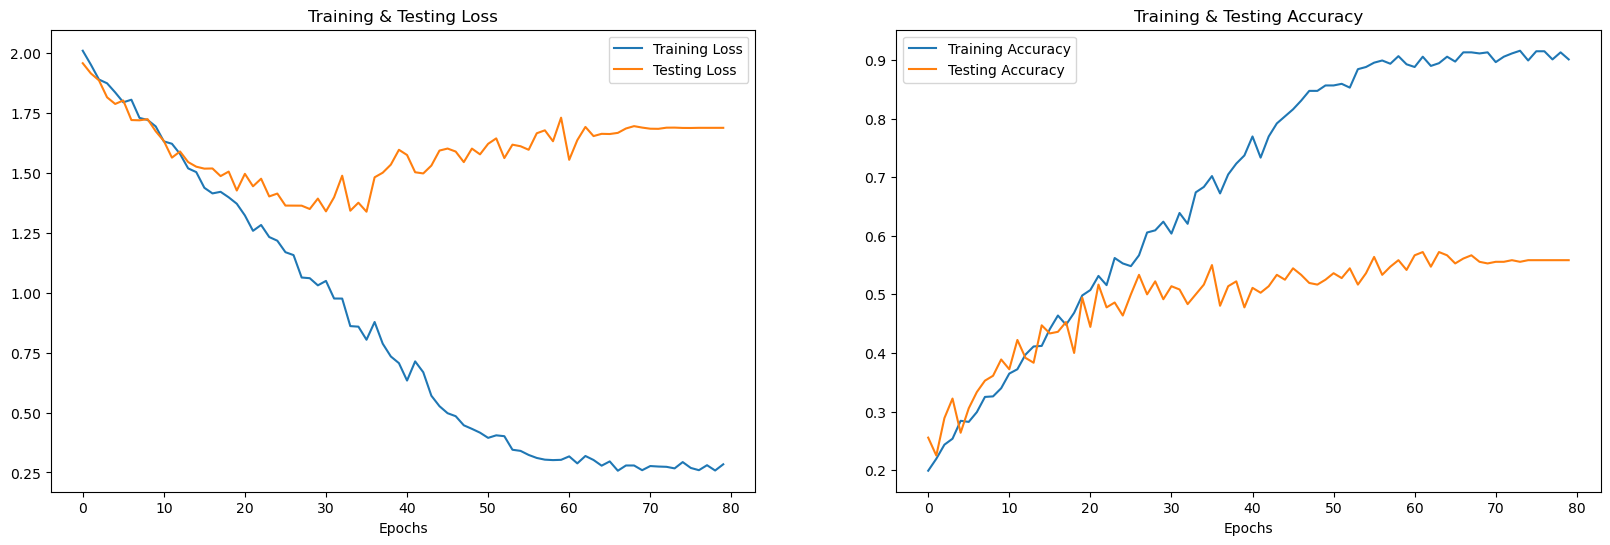

In [101]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,Y_test)[1]*100 , "%")

epochs = [i for i in range(80)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [102]:
# predicting on test data.
pred_test = model.predict(X_test)
Y_pred = encoder.inverse_transform(pred_test)

Y_test = encoder.inverse_transform(Y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [103]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = Y_pred.flatten()
df['Actual Labels'] = Y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0            angry         angry
1             fear          fear
2         surprise      surprise
3            angry         angry
4          disgust           sad
5             calm          calm
6             calm          calm
7              sad          fear
8          disgust       disgust
9          disgust       disgust